In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
print("done")

done


In [22]:
data = pd.read_csv('heart.csv')
print("Showing first few values")
print(data.head(), "\n")
print("Describing our data")
print(data.describe())

Showing first few values
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1   

Describing our data
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29

<AxesSubplot:>

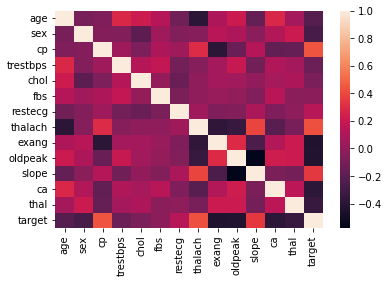

In [30]:
#Starting feature extraction process

#Need a heat map to assess correlation between variables so we can eliminate them
corr = data.corr()
sns.heatmap(corr)
# print(corr)

In [60]:
#Categorical Variables vs Dummy Variables
#TODO: Need to change this code ASAP
#TODO: Think about using Pytorch instead of this? 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#idk whether to get rid of this or not but author said something about convert some categorical variables into dummy variables
# dataset = pd.get_dummies(data, columns = ['sex', 'cp', 
#                                         'fbs','restecg', 
#                                         'exang', 'slope', 
#                                         'ca', 'thal'])


#author: scale all the values before training the Machine Learning models.

# standardScaler = StandardScaler()
# columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])


pd.set_option('display.precision', 2)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.95,1,3,0.76,-0.26,1,0,0.02,0,1.09,0,0,1,1
1,-1.92,1,2,-0.09,0.07,0,1,1.63,0,2.12,0,0,2,1
2,-1.47,0,1,-0.09,-0.82,0,0,0.98,0,0.31,2,0,2,1
3,0.18,1,1,-0.66,-0.20,0,1,1.24,0,-0.21,2,0,2,1
4,0.29,0,0,-0.66,2.08,0,1,0.58,1,-0.38,2,0,2,1


In [83]:
y = data['target']
X = data.drop(['target'], axis = 1)

from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

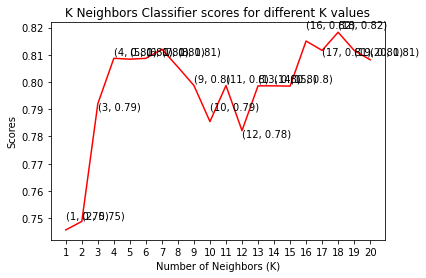

In [84]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1].round(2), (i, knn_scores[i-1].round(2)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [87]:
knn_classifier = KNeighborsClassifier(n_neighbors = 19)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8116129032258066

In [ ]:
#Need to evaluate now